In [1]:
import pandas as pd
import numpy as np

In [2]:
sd_mean_error = pd.DataFrame({'dw': {5: 5.176498862407688,
  10: 5.5920854915125409,
  15: 5.7759350324561813,
  20: 5.6342073370390056,
  25: 5.8893622779882051,
  30: 5.6197116178337128,
  35: 5.9638437301734575,
  40: 6.1087024259977225},
 'fridge': {5: 11.051342144765071,
  10: 10.151751353525787,
  15: 10.369209921622625,
  20: 10.153521201986747,
  25: 10.395878130697152,
  30: 10.143981709761031,
  35: 10.398511934325551,
  40: 10.678356797228169},
 'hvac': {5: 41.456164918478692,
  10: 42.696526905101365,
  15: 41.013572830132595,
  20: 40.609486841670822,
  25: 37.197133297186234,
  30: 39.662258024892203,
  35: 37.713097406442721,
  40: 38.27185066046642},
 'mw': {5: 3.8395188623199954,
  10: 3.967501994940386,
  15: 3.8617083923160944,
  20: 4.1287945780632205,
  25: 4.2829686504148015,
  30: 4.4174087702719058,
  35: 4.7663866949107403,
  40: 4.8825981046459646},
 'oven': {5: 13.148176466765525,
  10: 11.564168174193334,
  15: 12.521084653406037,
  20: 11.798429007437589,
  25: 13.4149674875818,
  30: 10.493022381927277,
  35: 10.332589328644424,
  40: 9.9103233526690655},
 'wm': {5: 1.4192316847749882,
  10: 1.444375551959485,
  15: 1.2501379913365882,
  20: 1.255405547129971,
  25: 1.2441867493063448,
  30: 1.2791745157535412,
  35: 1.2432944245360518,
  40: 1.2628505411868296}})

In [3]:
sd_mean_error

,dw,fridge,hvac,mw,oven,wm
5,5.176499,11.051342,41.456165,3.839519,13.148176,1.419232
10,5.592085,10.151751,42.696527,3.967502,11.564168,1.444376
15,5.775935,10.369210,41.013573,3.861708,12.521085,1.250138
20,5.634207,10.153521,40.609487,4.128795,11.798429,1.255406
25,5.889362,10.395878,37.197133,4.282969,13.414967,1.244187
30,5.619712,10.143982,39.662258,4.417409,10.493022,1.279175
35,5.963844,10.398512,37.713097,4.766387,10.332589,1.243294
40,6.108702,10.678357,38.271851,4.882598,9.910323,1.262851


In [4]:
sd_sem_error = pd.DataFrame({'dw': {5: 0.27155126889358572,
  10: 0.25354531115062673,
  15: 0.20932325575085148,
  20: 0.19256589464558593,
  25: 0.21376369587467134,
  30: 0.20530325129220683,
  35: 0.22964680425480671,
  40: 0.24245326709485171},
 'fridge': {5: 0.56593137173122765,
  10: 0.53300451678550864,
  15: 0.48442637737670874,
  20: 0.52435371399980357,
  25: 0.48529410786273336,
  30: 0.49332757253236437,
  35: 0.48773004417456095,
  40: 0.50091688375850807},
 'hvac': {5: 7.5699698919117555,
  10: 8.3835742783189726,
  15: 7.8515183958168553,
  20: 8.5928988725542776,
  25: 7.5248161108975156,
  30: 8.4218350776761675,
  35: 7.8732903052030618,
  40: 7.7498388102312985},
 'mw': {5: 0.35225479527652487,
  10: 0.34327661441870982,
  15: 0.33103447751903209,
  20: 0.34856699457349039,
  25: 0.3754250850483678,
  30: 0.38021475159397977,
  35: 0.42042863465627978,
  40: 0.42997566138075888},
 'oven': {5: 3.6547203831696766,
  10: 2.978418194757523,
  15: 3.4341438690420341,
  20: 3.2111837903899443,
  25: 3.7817842282519045,
  30: 2.5357089022659833,
  35: 2.439307356577884,
  40: 2.1008829363279231},
 'wm': {5: 0.27929626114992512,
  10: 0.31837400131981347,
  15: 0.30112148540047357,
  20: 0.24334555654410936,
  25: 0.24588824459586353,
  30: 0.2358903984516241,
  35: 0.22931128405962103,
  40: 0.2476744226307227}})

In [5]:
%matplotlib inline

In [7]:
import pickle
out_overall = pickle.load(open('../data/input/all_regions.pkl','r'))
train_df = out_overall['SanDiego']

In [7]:
np.random.seed(0)

In [8]:
out = {}

for appliance in sd_mean_error.columns:
    out[appliance] = {}
    if appliance =="hvac":
        month_start, month_end = 5, 11
    else:
        month_start, month_end=1, 13
    for month in range(month_start, month_end):
        out[appliance][month] = {}
        drop_train_df = train_df['%s_%d' %(appliance, month)].dropna()
        mean_entry = train_df['%s_%d' %(appliance, month)].mean()
        out[appliance][month] = (drop_train_df-mean_entry).abs().mean()
        

In [11]:
mean_region = pd.DataFrame(out).mean()

In [12]:
out['hvac']

{5: 10.847252749007984,
 6: 57.12228430885571,
 7: 108.41721988893876,
 8: 125.45122088179174,
 9: 125.34244930702923,
 10: 72.0900117829442}

In [13]:
out = {}
for appliance in sd_mean_error.columns:
    out[appliance] = {}
    if appliance =="hvac":
        month_start, month_end = 5, 11
    else:
        month_start, month_end=1, 13
    for month in range(month_start, month_end):
        out[appliance][month] = {}
        drop_train_df = train_df['%s_%d' %(appliance, month)].dropna()
        mean_entry = train_df['%s_%d' %(appliance, month)].mean()
        out[appliance][month] = (drop_train_df-mean_entry).abs().mean()
        

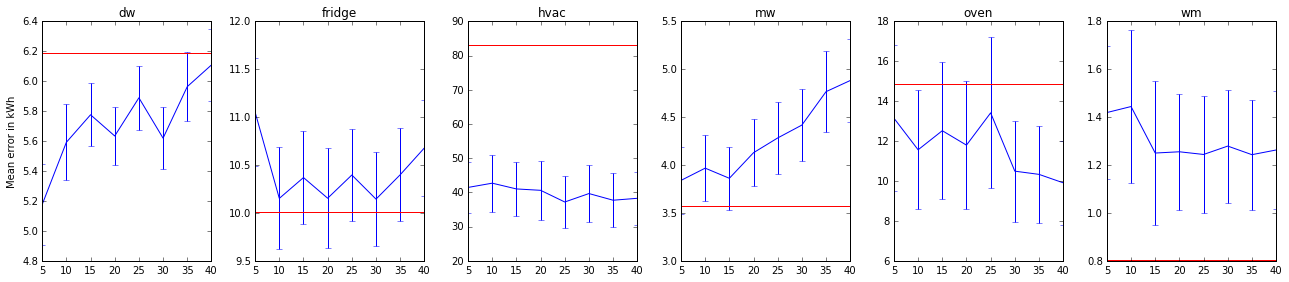

In [15]:

import matplotlib.pyplot as plt 
cols = len(sd_mean_error.columns)
fig, ax = plt.subplots(ncols=cols, figsize=(18,4))
for i, appliance in enumerate(sd_mean_error.columns):
    sd_mean_error[appliance].plot(yerr=sd_sem_error[appliance], ax=ax[i])
    ax[i].axhline(mean_region[appliance], color='r')
    #ax[i].axhline(oracle_accuracy[appliance], color='g')
    ax[i].set_title(appliance)
ax[0].set_ylabel("Mean error in kWh")
plt.tight_layout()
#plt.savefig("../results/oracle_matching_mean.png")

In [81]:
mean_region = pd.DataFrame(out).mean()

In [82]:
mean_region

dw         6.190171
fridge    10.010303
hvac      83.211740
mw         3.574312
oven      14.880261
wm         0.803791
dtype: float64

In [74]:
from itertools import combinations
out = {}
for appliance in sd_mean_error.columns:
    out[appliance] = {}
    for home in train_df.index:
        out[appliance][home] = {"best_prediction_array":{}, "best_score":1e7, "optimal_subset":{}}






appliance_columns = {'fridge':["fridge_%d" % i for i in range(1, 13)],
                     'hvac':["hvac_%d" % i for i in range(5, 11)],
                     "mw":["mw_%d" % i for i in range(1, 13)],
                     "dw":["dw_%d" % i for i in range(1, 13)],
                     "wm":["wm_%d" % i for i in range(1, 13)],
                     "oven":["oven_%d" % i for i in range(1, 13)]}

errors_dict = {}
for appliance in appliance_columns.keys():
    print appliance
    errors_dict[appliance] = {}
    for max_length in range(1, 3):
        errors_dict[appliance][max_length] = {}
        all_combinations = combinations(train_df.index, max_length)
        for train_homes in all_combinations:

            test_homes = np.setdiff1d(train_df.index,train_homes)
            for home in test_homes:
                pred_home = np.mean(train_df.ix[list(train_homes)][appliance_columns[appliance]])
                gt_home = train_df.ix[home][appliance_columns[appliance]]
                
                error = (gt_home-pred_home).abs().mean()
                
                if error<out[appliance][home]['best_score']:
                    errors_dict[appliance][max_length][home] = (gt_home-pred_home).abs()
                  
                    out[appliance][home]['best_score'] = error
                    out[appliance][home]['optimal_subset'] = train_homes
                    out[appliance][home]['best_prediction_array'] = pred_home

hvac
wm
fridge
mw
oven
dw


In [75]:
oracle_accuracy = pd.Series({f:pd.DataFrame(errors_dict[f][2]).mean().mean() for f in appliance_columns.keys()})

In [67]:
pd.DataFrame(errors_dict['dw'][2]).mean().mean()

dw         1.760769
fridge     4.844550
hvac      23.182456
mw         1.545814
oven       4.891420
wm         1.385187
dtype: float64

In [73]:
pd.DataFrame(errors_dict['wm'][2]).mean().mean()

0.18868327140808105

In [76]:
oracle_accuracy

dw         0.748570
fridge     3.542064
hvac      11.774974
mw         0.695382
oven       3.606222
wm         0.188683
dtype: float64

In [91]:
train_df = out_overall['Austin']
from itertools import combinations
out = {}
for appliance in sd_mean_error.columns:
    out[appliance] = {}
    for home in train_df.index:
        out[appliance][home] = {"best_prediction_array":{}, "best_score":1e7, "optimal_subset":{}}






appliance_columns = {'fridge':["fridge_%d" % i for i in range(1, 13)],
                     'hvac':["hvac_%d" % i for i in range(5, 11)],
                     "mw":["mw_%d" % i for i in range(1, 13)],
                     "dw":["dw_%d" % i for i in range(1, 13)],
                     "wm":["wm_%d" % i for i in range(1, 13)],
                     "oven":["oven_%d" % i for i in range(1, 13)]}

errors_dict = {}
for appliance in appliance_columns.keys():
    print appliance
    errors_dict[appliance] = {}
    for max_length in range(1, 2):
        errors_dict[appliance][max_length] = {}
        all_combinations = combinations(train_df.index, max_length)
        for train_homes in all_combinations:

            test_homes = np.setdiff1d(train_df.index,train_homes)
            for home in test_homes:
                pred_home = np.mean(train_df.ix[list(train_homes)][appliance_columns[appliance]])
                gt_home = train_df.ix[home][appliance_columns[appliance]]
                
                error = (gt_home-pred_home).abs().mean()
                
                if error<out[appliance][home]['best_score']:
                    errors_dict[appliance][max_length][home] = (gt_home-pred_home).abs()
                  
                    out[appliance][home]['best_score'] = error
                    out[appliance][home]['optimal_subset'] = train_homes
                    out[appliance][home]['best_prediction_array'] = pred_home

hvac
wm
fridge
mw
oven
dw


In [92]:
oracle_accuracy = pd.Series({f:pd.DataFrame(errors_dict[f][1]).mean().mean() for f in appliance_columns.keys()})

In [93]:
oracle_accuracy

dw         0.970759
fridge     2.791433
hvac      18.700419
mw         1.206990
oven       2.912483
wm         0.751847
dtype: float64

In [94]:
austin_mean_error = pd.DataFrame({'dw': {5: 6.4947639590194015,
  10: 6.2117077735665474,
  15: 6.3859031480752551,
  20: 5.9334155086976423,
  25: 6.5829255137520812,
  30: 5.8024449237479887,
  35: 5.3450266172632128,
  40: 5.5492020075859143},
 'ec': {5: 115.99749948416449,
  10: 109.05930352369906,
  15: 98.356755946581657,
  20: 94.446074638446404,
  25: 68.025493137665649,
  30: 83.305071246547016,
  35: 101.48513096680141,
  40: 159.84148451637409},
 'fridge': {5: 19.175269471010839,
  10: 17.628161001237313,
  15: 17.266711547100083,
  20: 14.768037967152422,
  25: 16.83406907664774,
  30: 17.699246170277654,
  35: 18.646752571396572,
  40: 16.015644021801101},
 'hvac': {5: 143.2248358465701,
  10: 136.54853605141355,
  15: 161.09180015893128,
  20: 107.99466508558316,
  25: 153.69478725986357,
  30: 172.06440342240089,
  35: 132.57951700914717,
  40: 143.2407070012201},
 'mw': {5: 5.897965183361932,
  10: 5.7450614114029781,
  15: 5.7239067403033639,
  20: 6.4381852278450538,
  25: 6.3071673790226086,
  30: 6.0571209335722891,
  35: 6.9118133891334255,
  40: 4.5361181733425964},
 'oven': {5: 9.3999712741035655,
  10: 9.2649113600656055,
  15: 7.3252063187581902,
  20: 10.724332578042231,
  25: 10.265627097175564,
  30: 12.870506182919231,
  35: 10.696812813851272,
  40: 7.9979284963674964},
 'wh': {5: 87.900304565189103,
  10: 72.145638308410469,
  15: 50.106477691084422,
  20: 70.929250131770132,
  25: 46.773734061474705,
  30: 34.29298494088642,
  35: 86.314872928457063,
  40: 71.223740307814424},
 'wm': {5: 3.5737517664174505,
  10: 3.3915025572177169,
  15: 3.0293719699035346,
  20: 3.9526734934874526,
  25: 5.3647592467956047,
  30: 3.6685337346105418,
  35: 2.6584645598196803,
  40: 4.2348965122188851}})

In [95]:
austin_sem_error = pd.DataFrame({'dw': {5: 0.17086232093361736,
  10: 0.18389962469620372,
  15: 0.22073076557382354,
  20: 0.22732997147766359,
  25: 0.22130782212535802,
  30: 0.1639108491025022,
  35: 0.32683946910627037,
  40: 0.36499607146400881},
 'ec': {5: 4.1448360926814027,
  10: 2.6630904408457861,
  15: 3.2880494445730037,
  20: 2.7251299026129279,
  25: 4.8891470606072014,
  30: 3.6596777772492741,
  35: 3.9280843742816716,
  40: 11.071823339280284},
 'fridge': {5: 0.59140987055266625,
  10: 0.54149890309639426,
  15: 0.59479156530590738,
  20: 0.27310736037676653,
  25: 0.71771424332491318,
  30: 0.6717594911831235,
  35: 0.56415401026860423,
  40: 0.37500243355576163},
 'hvac': {5: 17.701905880250379,
  10: 16.685637140570734,
  15: 23.398688682016601,
  20: 11.726911967405481,
  25: 22.105930756498122,
  30: 22.39065639774735,
  35: 13.948102140615948,
  40: 15.830994335057309},
 'mw': {5: 0.15196033075545906,
  10: 0.17985852255344179,
  15: 0.17069635618154852,
  20: 0.22093912492649498,
  25: 0.22304886129979151,
  30: 0.25670476345288129,
  35: 0.34480529711632435,
  40: 0.1529390883854447},
 'oven': {5: 0.49260451142784445,
  10: 0.48386409737058472,
  15: 0.24470596410989809,
  20: 0.67727961305360918,
  25: 1.1182034419857845,
  30: 1.0568906320640068,
  35: 1.0114326585818483,
  40: 0.44671857959194589},
 'wh': {5: 24.533234893480358,
  10: 11.454664978137982,
  15: 8.485491257216351,
  20: 4.9510199967911106,
  25: 6.9696059488697903,
  30: 4.4872410327275745,
  35: 9.3150905100982833,
  40: 10.527483319529152},
 'wm': {5: 0.27518011922723212,
  10: 0.27918186087436869,
  15: 0.29539635693196636,
  20: 0.38272689965423579,
  25: 0.79614519660752547,
  30: 0.26333160274488476,
  35: 0.49196434245090404,
  40: 0.35797628713904484}})

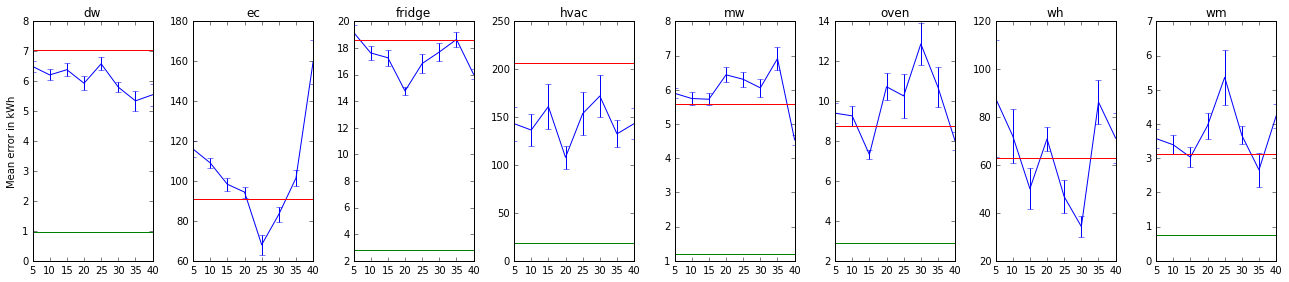

In [99]:

import matplotlib.pyplot as plt 
cols = len(austin_mean_error.columns)
fig, ax = plt.subplots(ncols=cols, figsize=(18,4))
for i, appliance in enumerate(austin_mean_error.columns):
    austin_mean_error[appliance].plot(yerr=austin_sem_error[appliance], ax=ax[i])
    try:
        ax[i].axhline(mean_region[appliance], color='r')
        ax[i].axhline(oracle_accuracy[appliance], color='g')
    except:
        pass
    ax[i].set_title(appliance)
ax[0].set_ylabel("Mean error in kWh")
plt.tight_layout()
#plt.savefig("../results/austin_oracle_matching_mean.png")

In [97]:
out = {}
for appliance in austin_mean_error.columns:
    out[appliance] = {}
    if appliance =="hvac":
        month_start, month_end = 5, 11
    else:
        month_start, month_end=1, 13
    for month in range(month_start, month_end):
        out[appliance][month] = {}
        drop_train_df = train_df['%s_%d' %(appliance, month)].dropna()
        mean_entry = train_df['%s_%d' %(appliance, month)].mean()
        out[appliance][month] = (drop_train_df-mean_entry).abs().mean()
mean_region = pd.DataFrame(out).mean()

In [98]:
mean_region

dw          7.032290
ec         90.841153
fridge     18.638845
hvac      206.734066
mw          5.585320
oven        8.752652
wh         62.902527
wm          3.136353
dtype: float64

In [156]:
# NEED TO RUN ON CLUSTER
import sys
CLUSTER=True
sys.path.insert(0,'../code/')
if CLUSTER:
    sys.path.insert(0, '/if6/nb2cz/anaconda/lib/python2.7/site-packages')

import  os

import numpy as np
import pandas as pd


from create_df_larger import read_df_larger
df, dfc, all_homes, appliance_min, national_average = read_df_larger()

df = df.rename(columns={'house_num_rooms':'num_rooms',
                        'num_occupants':'total_occupants',
                        'difference_ratio_min_max':'ratio_difference_min_max'})

from all_functions import *
from features_larger import *

import sys

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import LeaveOneOut

NUM_NEIGHBOUR_MAX = 6
F_MAX = 6
o = {}
import json
APPLIANCES= ["hvac","fridge","wm","dw","mw","oven","ec"]
all_homes['fridge']=np.setdiff1d(all_homes['fridge'], [59, 3893, 222, 5371])
#APPLIANCES=["hvac","fridge"]
for appliance in APPLIANCES:
    if appliance =="hvac":
        month_start, month_end = 5, 11
    else:
        month_start, month_end = 1, 13
    mean_df = df.ix[all_homes[appliance]][["%s_%d" %(appliance,month) for month in range(month_start, month_end)]].mean()
    gt_df = df.ix[all_homes[appliance]][["%s_%d" %(appliance,month) for month in range(month_start, month_end)]]
    o[appliance] = ((gt_df-mean_df).abs()/gt_df)
    
"""

out_path = os.path.expanduser("~/main-out-new-larger/")
out = {}
for feature in ["Static","Monthly","Monthly+Static"]:
    out[feature] = {}
    for appliance in APPLIANCES:
        out[feature][appliance] = {}
        if appliance =="hvac":
            month_start, month_end = 5, 11
        else:
            month_start, month_end = 1, 13
        for home in all_homes[appliance][:]:

            pred_df = pd.read_csv(out_path+"%s_%s_%d.csv" %(appliance, feature, home), index_col=0).squeeze()
            gt_df = df.ix[home][["%s_%d" %(appliance,month) for month in range(month_start, month_end)]]
            gt_df.index = range(month_start, month_end)
            pred_df.index = range(month_start, month_end)
            error = (gt_df-pred_df).abs()
            out[feature][appliance][home] = error.mean()
"""

'\n\nout_path = os.path.expanduser("~/main-out-new-larger/")\nout = {}\nfor feature in ["Static","Monthly","Monthly+Static"]:\n    out[feature] = {}\n    for appliance in APPLIANCES:\n        out[feature][appliance] = {}\n        if appliance =="hvac":\n            month_start, month_end = 5, 11\n        else:\n            month_start, month_end = 1, 13\n        for home in all_homes[appliance][:]:\n\n            pred_df = pd.read_csv(out_path+"%s_%s_%d.csv" %(appliance, feature, home), index_col=0).squeeze()\n            gt_df = df.ix[home][["%s_%d" %(appliance,month) for month in range(month_start, month_end)]]\n            gt_df.index = range(month_start, month_end)\n            pred_df.index = range(month_start, month_end)\n            error = (gt_df-pred_df).abs()\n            out[feature][appliance][home] = error.mean()\n'

In [157]:
p = 100-o['fridge']*100
p[p<0] = 0
p.mean().mean()

75.77532442028162

In [111]:
mean_df

dw_1     12.799892
dw_2     10.726777
dw_3     11.398667
dw_4     10.729835
dw_5     10.182237
dw_6      9.195279
dw_7      9.261850
dw_8     10.072984
dw_9     10.406815
dw_10    10.118914
dw_11    10.591207
dw_12    11.368336
dtype: float64

In [115]:
(gt_df-mean_df).abs().mean().mean()

7.2950761326368685